In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/ecom_data_clean.csv')
df

,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


# CODIFICACIÓN DE VARIABLES CATEGORICAS

In [3]:
categorical_columns = df.select_dtypes(object).columns
categorical_columns

Index(['preferred_login_device', 'preferred_payment_mode', 'gender',
       'prefered_order_cat', 'marital_status'],
      dtype='object')

In [4]:
ordinal_cols = ['gender']
onehot_cols = list(set(categorical_columns) - set(ordinal_cols))
onehot_cols

['preferred_login_device',
 'prefered_order_cat',
 'marital_status',
 'preferred_payment_mode']

In [9]:
import sklearn.compose
import sklearn.preprocessing
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(),ordinal_cols),
    (sklearn.preprocessing.OneHotEncoder(),onehot_cols),
    remainder='passthrough'
)
transformer
data_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(df),
        columns = transformer.get_feature_names_out(),
        index=df.index
    )
)

data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gender,preferred_login_device_Computer,preferred_login_device_Mobile Phone,preferred_login_device_Phone,prefered_order_cat_Fashion,prefered_order_cat_Grocery,prefered_order_cat_Laptop & Accessory,prefered_order_cat_Mobile,prefered_order_cat_Mobile Phone,prefered_order_cat_Others,...,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,5.0,5.0,6.0,0.0,16.0,1.0,2.0,3.0,225.0
5627,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.0,179.0


In [8]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.9/207.9 kB 3.5 MB/s eta 0:00:00


In [10]:
data_transformed_df = (
    data_transformed_df.clean_names(
        case_type="snake"
    )
)
data_transformed_df.columns

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['gender', 'preferred_login_device_computer',
       'preferred_login_device_mobile_phone', 'preferred_login_device_phone',
       'prefered_order_cat_fashion', 'prefered_order_cat_grocery',
       'prefered_order_cat_laptop_&_accessory', 'prefered_order_cat_mobile',
       'prefered_order_cat_mobile_phone', 'prefered_order_cat_others',
       'marital_status_divorced', 'marital_status_married',
       'marital_status_single', 'preferred_payment_mode_cc',
       'preferred_payment_mode_cod', 'preferred_payment_mode_cash_on_delivery',
       'preferred_payment_mode_credit_card',
       'preferred_payment_mode_debit_card', 'preferred_payment_mode_e_wallet',
       'preferred_payment_mode_upi', 'churn', 'tenure', 'city_tier',
       'warehouse_to_home', 'hour_spend_on_app', 'number_of_device_registered',
       'satisfaction_score', 'number_of_address', 'complain',
       'order_amount_hike_fromlast_year', 'coupon_used', 'order_count',
       'day_since_last_order', 'cashback_amount

In [11]:
data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("prefered_order_cat_", "order_").replace("preferred_payment_mode_", "payment_").replace("preferred_login_device_", "login_").replace("marital_status_", "")
)
data_transformed_df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gender,login_computer,login_mobile_phone,login_phone,order_fashion,order_grocery,order_laptop_&_accessory,order_mobile,order_mobile_phone,order_others,...,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,5.0,5.0,6.0,0.0,16.0,1.0,2.0,3.0,225.0
5627,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.0,179.0


In [12]:
data_transformed_df = data_transformed_df.rename(
    columns={
        "order_laptop_&_accessory":"order_laptop",
        "order_mobile":"order_phone",
        "payment_cash_on_delivery":"payment_cash",
        "payment_credit_card":"payment_credit",
        "payment_debit_card":"payment_debit",
        "payment_e_wallet":"payment_ewallet",
        "login_mobile_phone":"login_mobile",
        "warehouse_to_home":"distance",
        "hour_spend_on_app":"hour_spend",
        "number_of_device_registered":"device_registered",
        "number_of_address":"number_address",
        "order_amount_hike_fromlast_year":"order_lastyear",
        "day_since_last_order":"days_lastorder"
    }
)
data_transformed_df.columns

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['gender', 'login_computer', 'login_mobile', 'login_phone',
       'order_fashion', 'order_grocery', 'order_laptop', 'order_phone',
       'order_mobile_phone', 'order_others', 'divorced', 'married', 'single',
       'payment_cc', 'payment_cod', 'payment_cash', 'payment_credit',
       'payment_debit', 'payment_ewallet', 'payment_upi', 'churn', 'tenure',
       'city_tier', 'distance', 'hour_spend', 'device_registered',
       'satisfaction_score', 'number_address', 'complain', 'order_lastyear',
       'coupon_used', 'order_count', 'days_lastorder', 'cashback_amount'],
      dtype='object')

In [14]:
data_transformed_df.dtypes

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
gender,float64
login_computer,float64
login_mobile,float64
login_phone,float64
order_fashion,float64
order_grocery,float64
order_laptop,float64
order_phone,float64
order_mobile_phone,float64
order_others,float64


# CORRELACIÓN

In [15]:
corr_matrix = data_transformed_df.corr()
corr_churn = corr_matrix['churn']
corr_churn.sort_values(ascending=False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,churn
churn,1.000000
complain,0.250188
single,0.180847
order_mobile_phone,0.154387
order_phone,0.113364
device_registered,0.107939
satisfaction_score,0.105481
city_tier,0.084703
payment_cod,0.083933
login_phone,0.078916


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

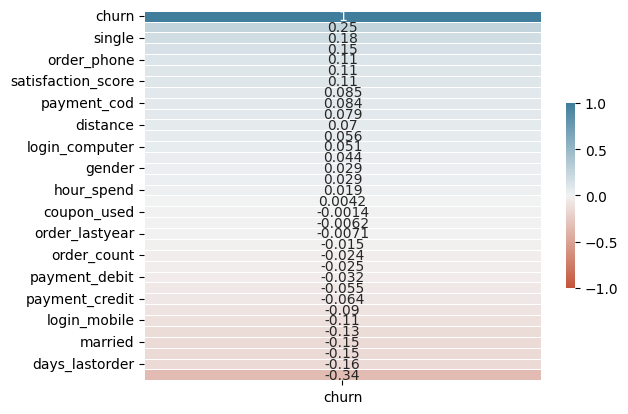

In [16]:
sns.heatmap(
    data=corr_churn.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

In [17]:
corr_filtered = corr_churn[corr_churn > 0]
cols = corr_filtered.index.tolist()
cols

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['gender',
 'login_computer',
 'login_phone',
 'order_phone',
 'order_mobile_phone',
 'single',
 'payment_cc',
 'payment_cod',
 'payment_ewallet',
 'payment_upi',
 'churn',
 'city_tier',
 'distance',
 'hour_spend',
 'device_registered',
 'satisfaction_score',
 'number_address',
 'complain']

In [19]:
df_data = data_transformed_df[cols].copy()
df_data.head(5)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gender,login_computer,login_phone,order_phone,order_mobile_phone,single,payment_cc,payment_cod,payment_ewallet,payment_upi,churn,city_tier,distance,hour_spend,device_registered,satisfaction_score,number_address,complain
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0
4,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,12.0,3.0,3.0,5.0,3.0,0.0


# ENTRENAMIENTO DEL MODELO DE ARBOL DE DECISIÓN

In [20]:
from sklearn.model_selection import train_test_split
X = df_data.drop("churn",axis=1)
y = df_data['churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=00000)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree1 = DecisionTreeClassifier()
tree1.fit(X_train,y_train)
y_pred = tree1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy TREE 1 : {accuracy}')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy TREE 1 : 0.9573712255772646


In [22]:
from sklearn.model_selection import GridSearchCV

# definirmos varios parametros
param_grid = {
    'max_depth': [3,4,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)

print("Mejores parametros : ",grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mejores parametros :  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [23]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy best model : {accuracy}')

Accuracy best model : 0.9067495559502664


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-27-4b1e45e671c8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns,y=importances,palette='bright',saturation= 2.0,edgecolor='black',linewidth=2)


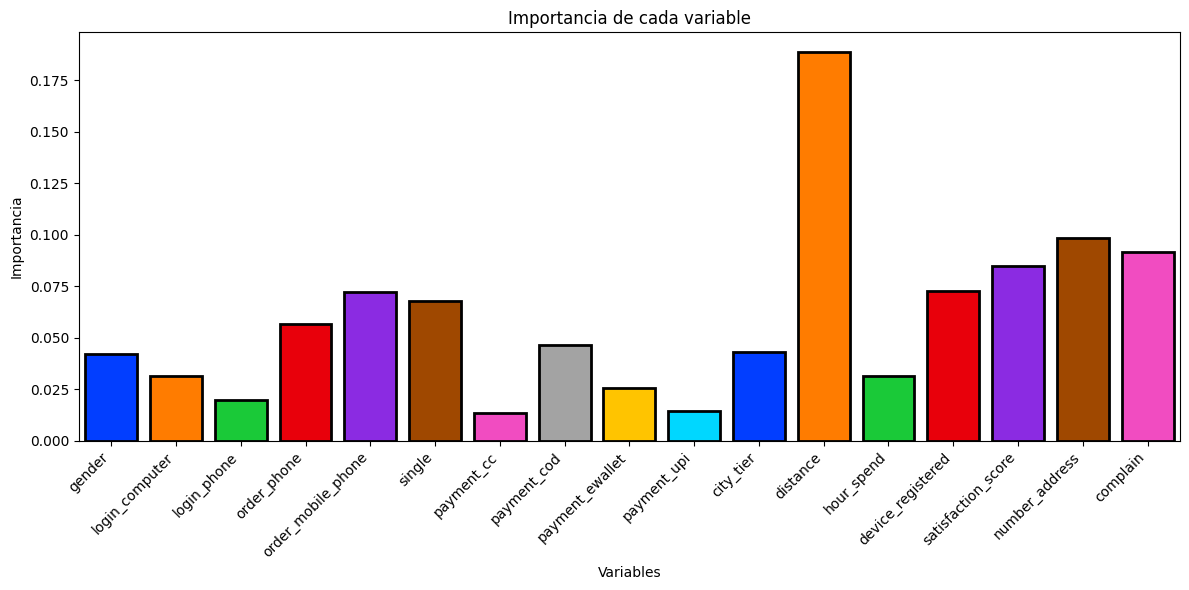

In [27]:
importances = best_model.feature_importances_
columns = X.columns
plt.figure(figsize=(12,6))
sns.barplot(x=columns,y=importances,palette='bright',saturation= 2.0,edgecolor='black',linewidth=2)
plt.title('Importancia de cada variable')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


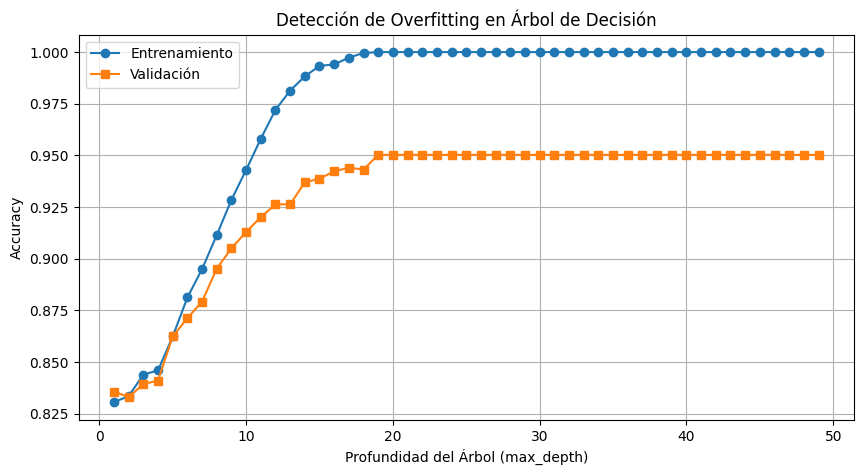

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Datos (usamos X, y de tu dataset)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_scores = []
val_scores = []
max_depths = range(1, 50)  # Profundidades de 1 a 20

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Evaluamos en los conjuntos de entrenamiento y validación
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))

    train_scores.append(train_acc)
    val_scores.append(val_acc)

# Graficamos las curvas de accuracy
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label="Entrenamiento", marker='o')
plt.plot(max_depths, val_scores, label="Validación", marker='s')
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("Accuracy")
plt.title("Detección de Overfitting en Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()